In [1]:
from ccsopt.utils import setrootdir

setrootdir("ccsopt")

'Directory ccsopt successfully loaded as current working directory.'

In [2]:
import numpy as np
import pandas as pd

from ccsopt.pso import PSOCCS
from ccsopt.stats import Stats
from ccsopt.predictor import CCSPredictor

In [3]:
df = pd.read_excel("data/Concrete_Data.xls")
df.columns = [
    "cement",
    "blastFurnaceSlag",
    "flyAsh",
    "water",
    "superplasticizer",
    "coarseAggregate",
    "fineAggregate",
    "age",
    "compressiveStrength"
]
df

,cement,blastFurnaceSlag,flyAsh,water,superplasticizer,coarseAggregate,fineAggregate,age,compressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [4]:
feature_names = list(df.columns[:-1])
component_names = list(df.columns[:-2])

In [5]:
df_stats = df.describe()
df_stats

,cement,blastFurnaceSlag,flyAsh,water,superplasticizer,coarseAggregate,fineAggregate,age,compressiveStrength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [6]:
predictor = CCSPredictor(bundle_path="data/rf_surrogate.joblib")

In [7]:
penalty_lambda = 0.0002
target_sum = df[component_names].sum(axis=1).mean()

bounds = {
    feature: (df_stats[feature]["min"], df_stats[feature]["max"]) for feature in feature_names
}

In [8]:
stats = Stats(
    n_runs=10,
    algorithm=PSOCCS,
    num_particles=50,
    num_iterations=100,
    inertia_weight=0.5,
    cognitive_coeff=1.5,
    social_coeff=1.5,
    feature_names=feature_names,
    component_names=component_names,
    bounds=bounds,
    penalty_lambda=penalty_lambda,
    target_sum=target_sum,
    predictor=predictor,
    seed=42
)

stats.run()

Running PSOCCS: 100%|██████████| 10/10 [02:03<00:00, 12.40s/run]


In [9]:
df_stats = stats.frame()
df_stats.to_csv("data/stats.csv", index=False)
df_stats

,iteration,best_solution,best_value,history,execution_time,memory_peak,memory_peak_mb
0,0,"[463.878899510887, 188.05620662344484, 28.7660...",72.188612,"[54.51985381898419, 55.84642372347084, 64.3423...",103.396261,683881,0.683881
1,1,"[463.878899510887, 188.05620662344484, 28.7660...",72.188612,"[54.51985381898419, 55.84642372347084, 64.3423...",92.108834,677910,0.677910
2,2,"[463.878899510887, 188.05620662344484, 28.7660...",72.188612,"[54.51985381898419, 55.84642372347084, 64.3423...",103.290268,685375,0.685375
3,3,"[463.878899510887, 188.05620662344484, 28.7660...",72.188612,"[54.51985381898419, 55.84642372347084, 64.3423...",123.924170,685312,0.685312
4,4,"[463.878899510887, 188.05620662344484, 28.7660...",72.188612,"[54.51985381898419, 55.84642372347084, 64.3423...",112.742738,684797,0.684797
5,5,"[463.878899510887, 188.05620662344484, 28.7660...",72.188612,"[54.51985381898419, 55.84642372347084, 64.3423...",123.389642,684744,0.684744
6,6,"[463.878899510887, 188.05620662344484, 28.7660...",72.188612,"[54.51985381898419, 55.84642372347084, 64.3423...",122.535147,685774,0.685774
7,7,"[463.878899510887, 188.05620662344484, 28.7660...",72.188612,"[54.51985381898419, 55.84642372347084, 64.3423...",98.920648,684977,0.684977
8,8,"[463.878899510887, 188.05620662344484, 28.7660...",72.188612,"[54.51985381898419, 55.84642372347084, 64.3423...",98.896749,678545,0.678545
9,9,"[463.878899510887, 188.05620662344484, 28.7660...",72.188612,"[54.51985381898419, 55.84642372347084, 64.3423...",98.491532,685357,0.685357


(<Figure size 1000x600 with 1 Axes>, <Axes: xlabel='Iteração', ylabel='Valor'>)

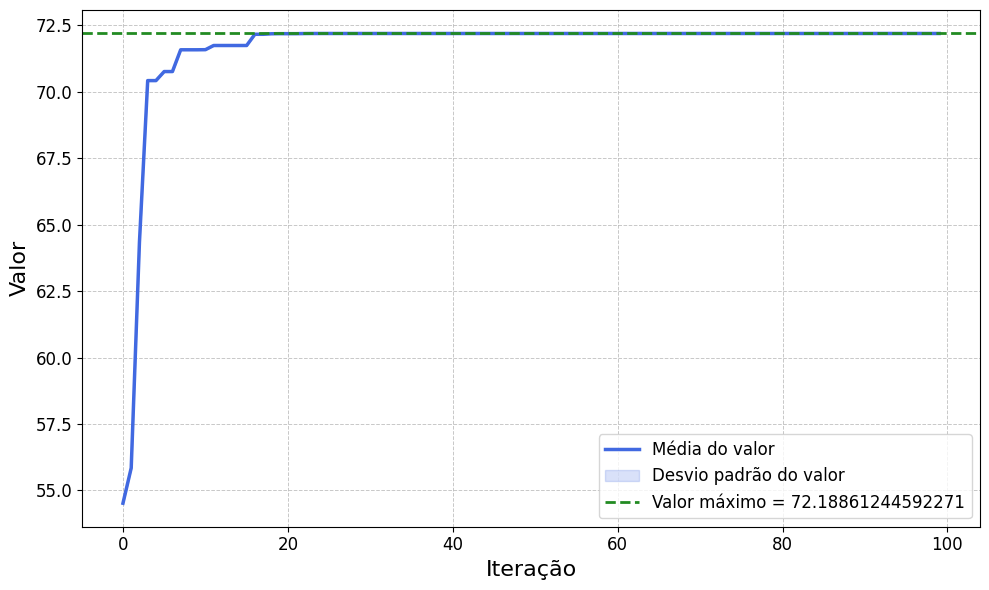

In [10]:
stats.plot_convergence(
    title="PSOCCS convergence",
    savefig="data/convergence.pdf"
)